# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

632


In [3]:
#Create a "for loop" to pull cities from random list and mathc with csv then add to another list

# cities_csv = pd.read_csv(output_data_file)

# print(cities_csv)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name = cities
city_data =[]
# url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
city_num = 0
for i, city in enumerate(city_name):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    try:
        response = requests.get(url).json()
        print(response)
        city_data.append({
            'city':response['name'],
            'lat':response['coord']['lat'],
            'lng':response['coord']['lon'],
            'max_temp':response['main']['temp_max'],
            'humidity':response['main']['humidity'],
            'cloudiness':response['clouds']['all'],
            'wind_speed':response['wind']['speed'],
            'country':response['sys']['country'],
            'date':response['dt'] })
        city_num+=1
        time.sleep(3)
    except:
        print("NaN")
        # have to get rid of the city not found or turn to NaN
        pass

{'coord': {'lon': 36.55, 'lat': 49.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.47, 'feels_like': 292.82, 'temp_min': 294.82, 'temp_max': 296.15, 'pressure': 1018, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1599086510, 'sys': {'type': 1, 'id': 8905, 'country': 'UA', 'sunrise': 1599101552, 'sunset': 1599149645}, 'timezone': 10800, 'id': 699328, 'name': 'Novopokrovka', 'cod': 200}
{'coord': {'lon': 19.92, 'lat': -11.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.82, 'feels_like': 291.63, 'temp_min': 291.82, 'temp_max': 291.82, 'pressure': 1013, 'humidity': 67, 'sea_level': 1013, 'grnd_level': 868}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 165}, 'clouds': {'all': 0}, 'dt': 1599086513, 'sys': {'country': 'AO', 'sunrise': 1599021794, 'sunset': 1599064622}

{'coord': {'lon': -110, 'lat': 53.28}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 286.15, 'feels_like': 280.16, 'temp_min': 286.15, 'temp_max': 286.15, 'pressure': 1007, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 8.2, 'deg': 310, 'gust': 14.9}, 'clouds': {'all': 40}, 'dt': 1599086561, 'sys': {'type': 1, 'id': 850, 'country': 'CA', 'sunrise': 1599049954, 'sunset': 1599098810}, 'timezone': -21600, 'id': 6058024, 'name': 'Lloydminster', 'cod': 200}
{'coord': {'lon': -50.16, 'lat': -13.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.91, 'feels_like': 298.12, 'temp_min': 299.91, 'temp_max': 299.91, 'pressure': 1009, 'humidity': 29, 'sea_level': 1009, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 1.63, 'deg': 51}, 'clouds': {'all': 1}, 'dt': 1599086565, 'sys': {'country': 'BR', 'sunrise': 15990386

{'coord': {'lon': -50.01, 'lat': -24.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.49, 'feels_like': 287.41, 'temp_min': 288.49, 'temp_max': 288.49, 'pressure': 1018, 'humidity': 94, 'sea_level': 1018, 'grnd_level': 906}, 'visibility': 10000, 'wind': {'speed': 3.54, 'deg': 70}, 'clouds': {'all': 1}, 'dt': 1599086610, 'sys': {'country': 'BR', 'sunrise': 1599039025, 'sunset': 1599080950}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
{'coord': {'lon': 128.18, 'lat': -3.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.8, 'feels_like': 303.51, 'temp_min': 298.15, 'temp_max': 299.26, 'pressure': 1011, 'humidity': 94}, 'visibility': 8000, 'wind': {'speed': 2.1, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1599086613, 'sys': {'type': 1, 'id': 9361, 'country': 'ID', 'sunrise': 1599081928, 'sunset': 1599125296}, '

{'coord': {'lon': 169.85, 'lat': -46.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 283.71, 'feels_like': 279.5, 'temp_min': 283.71, 'temp_max': 283.71, 'pressure': 1022, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 0, 'gust': 4.92}, 'clouds': {'all': 15}, 'dt': 1599086571, 'sys': {'type': 3, 'id': 2000217, 'country': 'NZ', 'sunrise': 1599073634, 'sunset': 1599113593}, 'timezone': 43200, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.2, 'feels_like': 307.59, 'temp_min': 304.15, 'temp_max': 304.26, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1599086664, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1599050717, 'sunset': 15

{'coord': {'lon': -155.09, 'lat': 19.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.39, 'feels_like': 300.06, 'temp_min': 297.59, 'temp_max': 303.15, 'pressure': 1016, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1599086469, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1599062730, 'sunset': 1599107673}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
{'coord': {'lon': -152.41, 'lat': 57.79}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 284.42, 'feels_like': 282.72, 'temp_min': 284.42, 'temp_max': 284.42, 'pressure': 1008, 'humidity': 82, 'sea_level': 1008, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 1.87, 'deg': 160}, 'rain': {'1h': 0.47}, 'clouds': {'all': 92}, 'dt': 1599086460, 'sys': {'country': 'US', 'sunrise': 1599059639,

{'cod': '404', 'message': 'city not found'}
NaN
{'coord': {'lon': 55.77, 'lat': -21.36}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 290.55, 'feels_like': 289.18, 'temp_min': 287.04, 'temp_max': 292.59, 'pressure': 1016, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1599086761, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1599099873, 'sunset': 1599142100}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
{'coord': {'lon': -68.17, 'lat': -15.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.62, 'feels_like': 296.79, 'temp_min': 295.62, 'temp_max': 295.62, 'pressure': 1013, 'humidity': 62, 'sea_level': 1013, 'grnd_level': 922}, 'visibility': 10000, 'wind': {'speed': 0.55, 'deg': 90}, 'clouds': {'all': 69}, 'dt': 1599086764, 's

{'coord': {'lon': 124.28, 'lat': -9.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 294.94, 'feels_like': 294.76, 'temp_min': 294.94, 'temp_max': 294.94, 'pressure': 1013, 'humidity': 64, 'sea_level': 1013, 'grnd_level': 918}, 'visibility': 10000, 'wind': {'speed': 2.4, 'deg': 49}, 'clouds': {'all': 16}, 'dt': 1599086809, 'sys': {'country': 'ID', 'sunrise': 1599083059, 'sunset': 1599126037}, 'timezone': 28800, 'id': 1626703, 'name': 'Soe', 'cod': 200}
{'coord': {'lon': 121.14, 'lat': 14.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.81, 'feels_like': 305.49, 'temp_min': 298.71, 'temp_max': 300.37, 'pressure': 1009, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 0.62, 'deg': 299}, 'clouds': {'all': 95}, 'dt': 1599086812, 'sys': {'type': 1, 'id': 8160, 'country': 'PH', 'sunrise': 1599083038, 'sunset': 159912

{'coord': {'lon': 49.96, 'lat': 52.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.62, 'feels_like': 280.38, 'temp_min': 284.62, 'temp_max': 284.62, 'pressure': 1028, 'humidity': 76, 'sea_level': 1028, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 5.18, 'deg': 36}, 'clouds': {'all': 0}, 'dt': 1599086861, 'sys': {'country': 'RU', 'sunrise': 1599098104, 'sunset': 1599146657}, 'timezone': 14400, 'id': 510347, 'name': 'Pestravka', 'cod': 200}
{'coord': {'lon': -10.07, 'lat': 20.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.05, 'feels_like': 299.82, 'temp_min': 302.05, 'temp_max': 302.05, 'pressure': 1010, 'humidity': 51, 'sea_level': 1010, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 7.02, 'deg': 208}, 'clouds': {'all': 92}, 'dt': 1599086864, 'sys': {'country': 'MR', 'sunrise': 1599027890,

{'coord': {'lon': 179.32, 'lat': 63.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 282.15, 'feels_like': 279.05, 'temp_min': 282.15, 'temp_max': 282.15, 'pressure': 1016, 'humidity': 57, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 87}, 'clouds': {'all': 8}, 'dt': 1599086617, 'sys': {'country': 'RU', 'sunrise': 1599065645, 'sunset': 1599117037}, 'timezone': 43200, 'id': 2126710, 'name': 'Beringovskiy', 'cod': 200}
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 294.2, 'feels_like': 297.57, 'temp_min': 294.15, 'temp_max': 294.26, 'pressure': 1016, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1599086916, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1599099361, 'sunset': 1599141

{'coord': {'lon': 98.68, 'lat': 3.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.43, 'feels_like': 300.7, 'temp_min': 297.43, 'temp_max': 297.43, 'pressure': 1010, 'humidity': 91, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 221}, 'clouds': {'all': 100}, 'dt': 1599086965, 'sys': {'country': 'ID', 'sunrise': 1599088770, 'sunset': 1599132611}, 'timezone': 25200, 'id': 1215412, 'name': 'Belawan', 'cod': 200}
{'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.3, 'feels_like': 298.18, 'temp_min': 296.3, 'temp_max': 296.3, 'pressure': 1021, 'humidity': 82, 'sea_level': 1021, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 164}, 'clouds': {'all': 94}, 'dt': 1599086968, 'sys': {'country': 'PT', 'sunrise': 1599031

{'coord': {'lon': 51.65, 'lat': 43.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.4, 'feels_like': 296.34, 'temp_min': 297.4, 'temp_max': 297.4, 'pressure': 1017, 'humidity': 42, 'sea_level': 1017, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 1.78, 'deg': 355}, 'clouds': {'all': 0}, 'dt': 1599087014, 'sys': {'country': 'KZ', 'sunrise': 1599098408, 'sunset': 1599145543}, 'timezone': 18000, 'id': 609919, 'name': 'Quryq', 'cod': 200}
{'coord': {'lon': 79.17, 'lat': 52.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.08, 'feels_like': 290.02, 'temp_min': 294.08, 'temp_max': 294.08, 'pressure': 1005, 'humidity': 42, 'sea_level': 1005, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 4.97, 'deg': 207}, 'clouds': {'all': 0}, 'dt': 1599087017, 'sys': {'country': 'RU', 'sunrise': 1599091098, 'sunset': 1599

{'coord': {'lon': 8.55, 'lat': 3.46}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 303.87, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1599087062, 'sys': {'type': 1, 'id': 2049, 'country': 'GQ', 'sunrise': 1599024022, 'sunset': 1599067851}, 'timezone': 3600, 'id': 2309528, 'name': 'Luba', 'cod': 200}
{'coord': {'lon': 47.32, 'lat': -19.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.89, 'feels_like': 284.4, 'temp_min': 285.89, 'temp_max': 285.89, 'pressure': 1019, 'humidity': 77, 'sea_level': 1019, 'grnd_level': 848}, 'visibility': 10000, 'wind': {'speed': 1.75, 'deg': 130}, 'clouds': {'all': 72}, 'dt': 1599087066, 'sys': {'country': 'MG', 'sunrise': 1599101841, 'sunset': 159914418

{'coord': {'lon': -105.17, 'lat': 21.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 303.05, 'feels_like': 305.75, 'temp_min': 301.15, 'temp_max': 304.26, 'pressure': 1016, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1599087115, 'sys': {'type': 1, 'id': 7127, 'country': 'MX', 'sunrise': 1599050692, 'sunset': 1599095754}, 'timezone': -21600, 'id': 3999162, 'name': 'Las Varas', 'cod': 200}
{'coord': {'lon': 167.48, 'lat': -22.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 292.91, 'feels_like': 287.29, 'temp_min': 292.91, 'temp_max': 292.91, 'pressure': 1023, 'humidity': 71, 'sea_level': 1023, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 10.01, 'deg': 126}, 'clouds': {'all': 17}, 'dt': 1599087118, 'sys': {'country': 'NC', 'sunrise': 1599073126, 'sunset':

{'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 291.65, 'feels_like': 291.35, 'temp_min': 291.15, 'temp_max': 292.15, 'pressure': 1023, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 79}, 'clouds': {'all': 20}, 'dt': 1599087164, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1599101775, 'sunset': 1599146591}, 'timezone': 10800, 'id': 110690, 'name': 'Faya', 'cod': 200}
{'coord': {'lon': 61.97, 'lat': 37.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.15, 'feels_like': 292.85, 'temp_min': 296.15, 'temp_max': 296.15, 'pressure': 1015, 'humidity': 31}, 'visibility': 6000, 'wind': {'speed': 3.1, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1599087167, 'sys': {'type': 1, 'id': 8990, 'country': 'TM', 'sunrise': 1599096263, 'sunset': 1599142735}, 'timezone': 18000, '

{'coord': {'lon': 73.07, 'lat': 5.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.03, 'feels_like': 299.72, 'temp_min': 301.03, 'temp_max': 301.03, 'pressure': 1007, 'humidity': 78, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 9.91, 'deg': 285}, 'clouds': {'all': 87}, 'dt': 1599087213, 'sys': {'country': 'MV', 'sunrise': 1599094873, 'sunset': 1599138798}, 'timezone': 18000, 'id': 1337606, 'name': 'Eydhafushi', 'cod': 200}
{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.92, 'feels_like': 282.07, 'temp_min': 285.92, 'temp_max': 285.92, 'pressure': 1017, 'humidity': 59, 'sea_level': 1017, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.88, 'deg': 163}, 'clouds': {'all': 0}, 'dt': 1599087216, 'sys': {'country': 'NA', 'sunrise': 15991098

{'coord': {'lon': -0.57, 'lat': 38.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 296.69, 'feels_like': 298.96, 'temp_min': 294.82, 'temp_max': 298.15, 'pressure': 1019, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1599087261, 'sys': {'type': 1, 'id': 6391, 'country': 'ES', 'sunrise': 1599111244, 'sunset': 1599157766}, 'timezone': 7200, 'id': 2511102, 'name': 'Santa Pola', 'cod': 200}
{'coord': {'lon': 98.63, 'lat': 9.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.95, 'feels_like': 304.76, 'temp_min': 299.95, 'temp_max': 299.95, 'pressure': 1009, 'humidity': 82, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.99, 'deg': 351}, 'clouds': {'all': 100}, 'dt': 1599087264, 'sys': {'country': 'TH', 'sunrise': 1599088581, 'sunset'

{'coord': {'lon': -156.68, 'lat': 20.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.18, 'feels_like': 299.12, 'temp_min': 298.71, 'temp_max': 305.15, 'pressure': 1015, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1599087245, 'sys': {'type': 1, 'id': 7851, 'country': 'US', 'sunrise': 1599063068, 'sunset': 1599108097}, 'timezone': -36000, 'id': 5849996, 'name': 'Lahaina', 'cod': 200}
{'coord': {'lon': 128.87, 'lat': 71.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 277.7, 'feels_like': 271.5, 'temp_min': 277.7, 'temp_max': 277.7, 'pressure': 1015, 'humidity': 82, 'sea_level': 1015, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 6.41, 'deg': 109}, 'clouds': {'all': 6}, 'dt': 1599087316, 'sys': {'country': 'RU', 'sunrise': 1599075503, 'sunset': 15991

{'coord': {'lon': 62.91, 'lat': 39.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.51, 'feels_like': 291.65, 'temp_min': 296.51, 'temp_max': 296.51, 'pressure': 1013, 'humidity': 22, 'sea_level': 1013, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 4.2, 'deg': 318}, 'clouds': {'all': 0}, 'dt': 1599087361, 'sys': {'country': 'TM', 'sunrise': 1599095928, 'sunset': 1599142619}, 'timezone': 18000, 'id': 1218420, 'name': 'Seydi', 'cod': 200}
{'coord': {'lon': 71.64, 'lat': 48.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.99, 'feels_like': 290.51, 'temp_min': 293.99, 'temp_max': 293.99, 'pressure': 1009, 'humidity': 29, 'sea_level': 1009, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 234}, 'clouds': {'all': 2}, 'dt': 1599087364, 'sys': {'country': 'KZ', 'sunrise': 1599093216, 'sunset': 1

{'coord': {'lon': -120.46, 'lat': 34.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.8, 'feels_like': 288.88, 'temp_min': 291.15, 'temp_max': 293.71, 'pressure': 1017, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 270, 'gust': 9.8}, 'clouds': {'all': 1}, 'dt': 1599087413, 'sys': {'type': 1, 'id': 4747, 'country': 'US', 'sunrise': 1599053772, 'sunset': 1599100011}, 'timezone': -25200, 'id': 5367788, 'name': 'Lompoc', 'cod': 200}
{'coord': {'lon': -73.4, 'lat': -37.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.21, 'feels_like': 278.46, 'temp_min': 280.21, 'temp_max': 280.21, 'pressure': 1023, 'humidity': 85, 'sea_level': 1023, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 0.81, 'deg': 175}, 'clouds': {'all': 83}, 'dt': 1599087416, 'sys': {'country': 'CL', 'sunrise': 1599045184, 'su

{'coord': {'lon': -52.9, 'lat': 65.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.08, 'feels_like': 275.44, 'temp_min': 280.08, 'temp_max': 280.08, 'pressure': 1010, 'humidity': 62, 'sea_level': 1010, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.83, 'deg': 19}, 'clouds': {'all': 82}, 'dt': 1599087197, 'sys': {'country': 'GL', 'sunrise': 1599034449, 'sunset': 1599086914}, 'timezone': -7200, 'id': 3421982, 'name': 'Maniitsoq', 'cod': 200}
{'coord': {'lon': 143.21, 'lat': -9.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.18, 'feels_like': 299.44, 'temp_min': 299.18, 'temp_max': 299.18, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.68, 'deg': 132}, 'clouds': {'all': 80}, 'dt': 1599087468, 'sys': {'country': 'PG', 'sunrise': 1599

{'coord': {'lon': -151.26, 'lat': 60.55}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 284.77, 'feels_like': 278.6, 'temp_min': 284.15, 'temp_max': 285.15, 'pressure': 1007, 'humidity': 87}, 'visibility': 4828, 'wind': {'speed': 8.7, 'deg': 200}, 'rain': {'1h': 3.56}, 'clouds': {'all': 90}, 'dt': 1599087517, 'sys': {'type': 1, 'id': 7680, 'country': 'US', 'sunrise': 1599058981, 'sunset': 1599109583}, 'timezone': -28800, 'id': 5866063, 'name': 'Kenai', 'cod': 200}
{'coord': {'lon': -9.24, 'lat': 32.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.44, 'feels_like': 293.54, 'temp_min': 293.44, 'temp_max': 293.44, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 49}, 'clouds': {'all

{'coord': {'lon': 29.37, 'lat': 56.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.12, 'feels_like': 286.76, 'temp_min': 288.12, 'temp_max': 288.12, 'pressure': 1020, 'humidity': 94, 'sea_level': 1020, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.75, 'deg': 115}, 'clouds': {'all': 100}, 'dt': 1599087567, 'sys': {'country': 'RU', 'sunrise': 1599102647, 'sunset': 1599151996}, 'timezone': 10800, 'id': 503878, 'name': 'Pustoshka', 'cod': 200}
{'coord': {'lon': 78.36, 'lat': 42.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 287.45, 'feels_like': 286.23, 'temp_min': 287.45, 'temp_max': 287.45, 'pressure': 1016, 'humidity': 60, 'sea_level': 1016, 'grnd_level': 841}, 'visibility': 10000, 'wind': {'speed': 0.63, 'deg': 24}, 'clouds': {'all': 0}, 'dt': 1599087570, 'sys': {'country': 'KG', 'sunrise': 1599092022

{'coord': {'lon': 18.94, 'lat': 9.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.75, 'feels_like': 297.05, 'temp_min': 294.75, 'temp_max': 294.75, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 2.65, 'deg': 155}, 'clouds': {'all': 100}, 'dt': 1599087617, 'sys': {'country': 'TD', 'sunrise': 1599107723, 'sunset': 1599151925}, 'timezone': 3600, 'id': 2429344, 'name': 'Kyabé', 'cod': 200}
{'coord': {'lon': 18.96, 'lat': 69.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.15, 'feels_like': 276.58, 'temp_min': 283.15, 'temp_max': 283.15, 'pressure': 1016, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1599087621, 'sys': {'type': 1, 'id': 1681, 'country': 'NO', 'sunrise': 1599102676, 'sunset': 159

{'coord': {'lon': 4.27, 'lat': 39.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.15, 'feels_like': 292.02, 'temp_min': 292.15, 'temp_max': 292.15, 'pressure': 1020, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1599087666, 'sys': {'type': 1, 'id': 6422, 'country': 'ES', 'sunrise': 1599109987, 'sunset': 1599156700}, 'timezone': 7200, 'id': 2514301, 'name': 'Mahon', 'cod': 200}
{'coord': {'lon': 114.97, 'lat': -8.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 301.87, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1011, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 110}, 'clouds': {'all': 40}, 'dt': 1599087670, 'sys': {'type': 1, 'id': 9333, 'country': 'ID', 'sunrise': 1599085239, 'sunset': 1599128324}, 'timezone'

{'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 280.07, 'feels_like': 274.03, 'temp_min': 280.07, 'temp_max': 280.07, 'pressure': 1010, 'humidity': 69, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.15, 'deg': 326}, 'clouds': {'all': 32}, 'dt': 1599087715, 'sys': {'country': 'GL', 'sunrise': 1599034328, 'sunset': 1599085484}, 'timezone': -7200, 'id': 3421193, 'name': 'Paamiut', 'cod': 200}
{'coord': {'lon': 72.57, 'lat': 50.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.25, 'feels_like': 287.21, 'temp_min': 292.25, 'temp_max': 292.25, 'pressure': 1008, 'humidity': 31, 'sea_level': 1008, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 4.71, 'deg': 223}, 'clouds': {'all': 0}, 'dt': 1599087719, 'sys': {'country': 'KZ', 'sunrise': 159909283

{'coord': {'lon': -2.24, 'lat': 4.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.01, 'feels_like': 298.96, 'temp_min': 297.01, 'temp_max': 297.01, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.15, 'deg': 231}, 'clouds': {'all': 70}, 'dt': 1599087650, 'sys': {'country': 'GH', 'sunrise': 1599026564, 'sunset': 1599070487}, 'timezone': 0, 'id': 2303611, 'name': 'Esim', 'cod': 200}
{'coord': {'lon': 35.26, 'lat': -16.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 292.49, 'feels_like': 293.46, 'temp_min': 292.49, 'temp_max': 292.49, 'pressure': 1021, 'humidity': 83, 'sea_level': 1021, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 180}, 'clouds': {'all': 22}, 'dt': 1599087768, 'sys': {'country': 'MW', 'sunrise': 1599104642, 'sun

{'coord': {'lon': 125.48, 'lat': 12.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.64, 'feels_like': 305.17, 'temp_min': 300.64, 'temp_max': 300.64, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.44, 'deg': 185}, 'clouds': {'all': 98}, 'dt': 1599087817, 'sys': {'country': 'PH', 'sunrise': 1599082062, 'sunset': 1599126458}, 'timezone': 28800, 'id': 1731248, 'name': 'Alugan', 'cod': 200}
{'coord': {'lon': -67.5, 'lat': -45.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 288.15, 'feels_like': 282.46, 'temp_min': 288.15, 'temp_max': 288.15, 'pressure': 1011, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 290}, 'clouds': {'all': 25}, 'dt': 1599087820, 'sys': {'type': 1, 'id': 8284, 'country': 'AR', 'sunrise': 1599044211, 'suns

{'coord': {'lon': 123.96, 'lat': 8.16}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 300.78, 'feels_like': 305.47, 'temp_min': 300.78, 'temp_max': 300.78, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 233}, 'clouds': {'all': 35}, 'dt': 1599087869, 'sys': {'country': 'PH', 'sunrise': 1599082562, 'sunset': 1599126688}, 'timezone': 28800, 'id': 1703554, 'name': 'Maigo', 'cod': 200}
{'coord': {'lon': -39.27, 'lat': -3.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.72, 'feels_like': 298.35, 'temp_min': 298.72, 'temp_max': 298.72, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.9, 'deg': 101}, 'clouds': {'all': 1}, 'dt': 1599087872, 'sys': {'country': 'BR', 'sunrise': 1599035716,

{'coord': {'lon': 80.23, 'lat': 50.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.15, 'feels_like': 290.03, 'temp_min': 291.15, 'temp_max': 291.15, 'pressure': 1008, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1599087917, 'sys': {'type': 1, 'id': 8833, 'country': 'KZ', 'sunrise': 1599091010, 'sunset': 1599139225}, 'timezone': 21600, 'id': 1519422, 'name': 'Semey', 'cod': 200}
{'coord': {'lon': 104.21, 'lat': 36.56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 284.68, 'feels_like': 282.21, 'temp_min': 283.15, 'temp_max': 286.48, 'pressure': 1022, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 330}, 'clouds': {'all': 91}, 'dt': 1599087921, 'sys': {'type': 1, 'id': 9639, 'country': 'CN', 'sunrise': 1599086169, 'sunset': 1599132558}, 'timezone': 28

{'coord': {'lon': -3.61, 'lat': 37.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.83, 'feels_like': 291.96, 'temp_min': 290.37, 'temp_max': 293.15, 'pressure': 1020, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 0.58, 'deg': 156}, 'clouds': {'all': 0}, 'dt': 1599087914, 'sys': {'type': 1, 'id': 6408, 'country': 'ES', 'sunrise': 1599112027, 'sunset': 1599158441}, 'timezone': 7200, 'id': 2517117, 'name': 'Granada', 'cod': 200}
{'coord': {'lon': 146.42, 'lat': 68.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 279.69, 'feels_like': 273.72, 'temp_min': 279.69, 'temp_max': 279.69, 'pressure': 1022, 'humidity': 75, 'sea_level': 1022, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 6.24, 'deg': 97}, 'clouds': {'all': 71}, 'dt': 1599087973, 'sys': {'country': 'RU', 'sunrise': 1599072333, 'sunset': 1599126

{'coord': {'lon': -2.49, 'lat': 53.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 289.49, 'feels_like': 289.8, 'temp_min': 288.71, 'temp_max': 290.37, 'pressure': 1011, 'humidity': 91}, 'visibility': 9817, 'wind': {'speed': 1.79, 'deg': 125, 'gust': 4.47}, 'rain': {'1h': 0.56}, 'clouds': {'all': 100}, 'dt': 1599088018, 'sys': {'type': 3, 'id': 2001932, 'country': 'GB', 'sunrise': 1599110601, 'sunset': 1599159331}, 'timezone': 3600, 'id': 2656847, 'name': 'Atherton', 'cod': 200}
{'coord': {'lon': 138.6, 'lat': -34.93}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 285.09, 'feels_like': 277.85, 'temp_min': 282.59, 'temp_max': 287.04, 'pressure': 1012, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 9.3, 'deg': 290}, 'rain': {'1h': 0.25}, 'clouds': {'all': 75}, 'dt': 1599088022, 'sys': {'type': 1, 'id': 9566,

{'coord': {'lon': 61.16, 'lat': 36.54}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.15, 'feels_like': 291.3, 'temp_min': 293.15, 'temp_max': 293.15, 'pressure': 1015, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1599088071, 'sys': {'type': 1, 'id': 7484, 'country': 'IR', 'sunrise': 1599096508, 'sunset': 1599142878}, 'timezone': 16200, 'id': 1159716, 'name': 'Sarakhs', 'cod': 200}
{'coord': {'lon': 14.64, 'lat': 63.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.15, 'feels_like': 279.23, 'temp_min': 284.15, 'temp_max': 284.15, 'pressure': 1018, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1599087817, 'sys': {'type': 1, 'id': 1774, 'country': 'SE', 'sunrise': 1599105221, 'sunset': 1599156490}, 'timezone': 7200, 'i

{'coord': {'lon': -134.42, 'lat': 58.3}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 285.37, 'feels_like': 285.32, 'temp_min': 285.37, 'temp_max': 285.37, 'pressure': 1047, 'humidity': 91}, 'visibility': 322, 'wind': {'speed': 0.45, 'deg': 157, 'gust': 0.45}, 'rain': {'1h': 1.66}, 'clouds': {'all': 100}, 'dt': 1599088122, 'sys': {'type': 3, 'id': 2011341, 'country': 'US', 'sunrise': 1599055249, 'sunset': 1599105234}, 'timezone': -28800, 'id': 5554072, 'name': 'Juneau', 'cod': 200}
{'coord': {'lon': -16.33, 'lat': 33.08}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 294.15, 'feels_like': 294.28, 'temp_min': 294.15, 'temp_max': 294.15, 'pressure': 1018, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1599088126, 'sys': {'type': 1, 'id': 6902, 'country': 'PT', 'sunrise': 15991

{'coord': {'lon': 84.6, 'lat': 18.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.51, 'feels_like': 305.22, 'temp_min': 300.51, 'temp_max': 300.51, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.73, 'deg': 358}, 'clouds': {'all': 100}, 'dt': 1599088174, 'sys': {'country': 'IN', 'sunrise': 1599091638, 'sunset': 1599136500}, 'timezone': 19800, 'id': 1255816, 'name': 'Sompeta', 'cod': 200}
{'coord': {'lon': 117.94, 'lat': 40.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 286.69, 'feels_like': 285.05, 'temp_min': 286.69, 'temp_max': 286.69, 'pressure': 1008, 'humidity': 76, 'sea_level': 1008, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 2.18, 'deg': 317}, 'clouds': {'all': 0}, 'dt': 1599088178, 'sys': {'country': 'CN', 'sunrise': 1599082625

{'cod': '404', 'message': 'city not found'}
NaN
{'coord': {'lon': 91.6, 'lat': 55.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.19, 'feels_like': 285.1, 'temp_min': 286.19, 'temp_max': 286.19, 'pressure': 1006, 'humidity': 94, 'sea_level': 1006, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 2.49, 'deg': 173}, 'clouds': {'all': 100}, 'dt': 1599088224, 'sys': {'country': 'RU', 'sunrise': 1599087798, 'sunset': 1599136980}, 'timezone': 25200, 'id': 1510998, 'name': 'Balakhta', 'cod': 200}
{'coord': {'lon': -49.12, 'lat': -15.32}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 297.55, 'feels_like': 294.72, 'temp_min': 297.55, 'temp_max': 297.55, 'pressure': 1013, 'humidity': 31, 'sea_level': 1013, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 2.78, 'deg': 92}, 'clouds': {'all': 18}, 'dt': 15990882

{'coord': {'lon': -74.62, 'lat': -15.43}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.48, 'feels_like': 286.39, 'temp_min': 288.48, 'temp_max': 288.48, 'pressure': 1014, 'humidity': 74, 'sea_level': 1014, 'grnd_level': 995}, 'visibility': 9479, 'wind': {'speed': 3.33, 'deg': 153}, 'clouds': {'all': 58}, 'dt': 1599088275, 'sys': {'country': 'PE', 'sunrise': 1599044596, 'sunset': 1599087190}, 'timezone': -18000, 'id': 3948613, 'name': 'Acarí', 'cod': 200}
{'coord': {'lon': 121.42, 'lat': 29.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.2, 'feels_like': 302.72, 'temp_min': 297.04, 'temp_max': 300.37, 'pressure': 1004, 'humidity': 99}, 'visibility': 10000, 'wind': {'speed': 2.61, 'deg': 312}, 'clouds': {'all': 0}, 'dt': 1599088278, 'sys': {'type': 3, 'id': 2000883, 'country': 'CN', 'sunrise': 1599082386, 'sunset': 1599

{'coord': {'lon': 57.76, 'lat': -20.21}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 293.72, 'feels_like': 296.64, 'temp_min': 293.15, 'temp_max': 294.26, 'pressure': 1015, 'humidity': 100}, 'visibility': 6000, 'wind': {'speed': 1.5, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1599088327, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1599099356, 'sunset': 1599141662}, 'timezone': 14400, 'id': 1106643, 'name': 'Quatre Cocos', 'cod': 200}
{'coord': {'lon': 76.78, 'lat': 19.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.27, 'feels_like': 297.68, 'temp_min': 295.27, 'temp_max': 295.27, 'pressure': 1007, 'humidity': 85, 'sea_level': 1007, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 1.49, 'deg': 344}, 'clouds': {'all': 88}, 'dt': 1599088330, 'sys': {'country': 'IN', 'sunrise': 1599

{'coord': {'lon': 82.74, 'lat': 55.31}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.15, 'feels_like': 289.88, 'temp_min': 293.15, 'temp_max': 293.15, 'pressure': 1000, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6, 'deg': 200}, 'clouds': {'all': 63}, 'dt': 1599088376, 'sys': {'type': 1, 'id': 8958, 'country': 'RU', 'sunrise': 1599089935, 'sunset': 1599139095}, 'timezone': 25200, 'id': 1502822, 'name': "Kolyvan'", 'cod': 200}
{'coord': {'lon': 4.69, 'lat': 51.83}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.26, 'feels_like': 286.32, 'temp_min': 284.82, 'temp_max': 287.59, 'pressure': 1019, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 214, 'gust': 0.89}, 'clouds': {'all': 81}, 'dt': 1599088379, 'sys': {'type': 3, 'id': 2030759, 'country': 'NL', 'sunrise': 1599109034, 'sunset': 15

In [ ]:
#Printing the city log
for i, city in city_data:
    print(i,city)

In [5]:
#Exporting to a csv
city_data_csv = pd.DataFrame(city_data)
# city_data_csv.to_csv("../output_data/city.csv")


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Exporting to a csv
city_data_csv = pd.DataFrame(city_data)
city_data_csv.to_csv("../output_data/city.csv")
city_data_csv.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Novopokrovka,49.84,36.55,296.15,31,0,2.00,UA,1599086510
1,Luena,-11.78,19.92,291.82,67,0,1.34,AO,1599086513
2,Deputatsky,69.30,139.90,274.61,88,86,2.98,RU,1599086516
3,Hobyo,5.35,48.53,297.80,84,75,10.47,SO,1599086519
4,Laguna,38.42,-121.42,302.59,42,1,2.60,US,1599086523


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#There are no cities where the humidty 
city_humid = city_data_csv.loc[city_data_csv['humidity']>100]
city_humid

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date


In [8]:
city_data_csv.describe()

,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,21.336858,21.014323,292.363924,73.357639,50.588542,3.608819,1.599087e+09
std,33.622736,90.048376,7.713831,18.794001,38.283644,2.485482,5.577595e+02
min,-54.800000,-179.170000,270.380000,11.000000,0.000000,0.080000,1.599086e+09
25%,-5.640000,-56.717500,286.150000,64.000000,7.750000,1.727500,1.599087e+09
50%,26.060000,26.350000,293.150000,77.000000,58.000000,3.090000,1.599087e+09
75%,50.605000,101.377500,298.780000,87.000000,89.000000,5.012500,1.599088e+09
max,78.220000,179.320000,310.370000,100.000000,100.000000,13.290000,1.599088e+09


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame(city_data_csv)
clean_city_data

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Novopokrovka,49.84,36.55,296.15,31,0,2.00,UA,1599086510
1,Luena,-11.78,19.92,291.82,67,0,1.34,AO,1599086513
2,Deputatsky,69.30,139.90,274.61,88,86,2.98,RU,1599086516
3,Hobyo,5.35,48.53,297.80,84,75,10.47,SO,1599086519
4,Laguna,38.42,-121.42,302.59,42,1,2.60,US,1599086523
...,...,...,...,...,...,...,...,...,...
571,Coquimbo,-29.95,-71.34,286.15,82,0,7.20,CL,1599088366
572,Ambilobe,-13.20,49.05,291.07,89,18,1.22,MG,1599088369
573,Sinnamary,5.38,-52.95,299.57,81,53,5.58,GF,1599088373
574,Kolyvan',55.31,82.74,293.15,64,63,6.00,RU,1599088376


In [10]:
# Extract relevant fields from the data frame
clean_city_data.columns
city_data_df = clean_city_data[['city', 'lat', 'lng', 'max_temp', 'humidity', 'cloudiness',
       'wind_speed', 'country']]
city_data_df
# Export the City_Data into a csv


#Question about am I doing this correctly, do I need a csv file that is created 

city_data_df.to_csv(index=False)
city_data_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country
0,Novopokrovka,49.84,36.55,296.15,31,0,2.00,UA
1,Luena,-11.78,19.92,291.82,67,0,1.34,AO
2,Deputatsky,69.30,139.90,274.61,88,86,2.98,RU
3,Hobyo,5.35,48.53,297.80,84,75,10.47,SO
4,Laguna,38.42,-121.42,302.59,42,1,2.60,US


In [11]:
print(len(city_data_df))

576


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

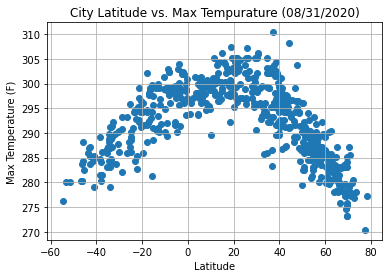

In [12]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['max_temp']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Max Tempurature (08/31/2020)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig("../output_data/scatter1.png")

## Latitude vs. Humidity Plot

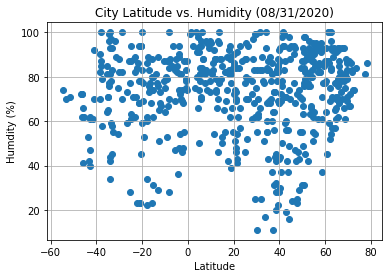

In [13]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['humidity']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Humidity (08/31/2020)')
plt.ylabel('Humdity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig("../output_data/scatter2.png")

## Latitude vs. Cloudiness Plot

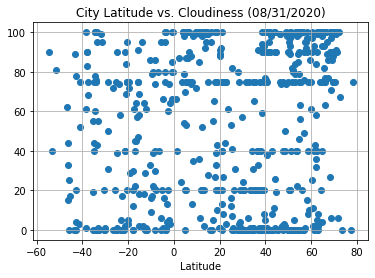

In [14]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['cloudiness']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Cloudiness (08/31/2020)')
plt.ylabel('')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig("../output_data/scatter3.png")

## Latitude vs. Wind Speed Plot

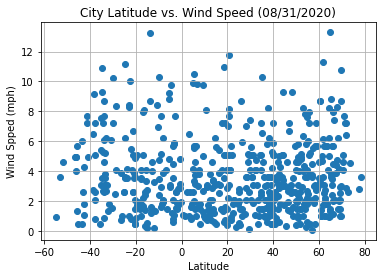

In [15]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['wind_speed']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Wind Speed (08/31/2020)')
plt.ylabel('Wind Spped (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig("../output_data/scatter4.png")

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
#Creating a data for for the specific hemishphers
south_hem = city_data_df.loc[city_data_df['lat']<0]
south_hem

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country
1,Luena,-11.78,19.92,291.82,67,0,1.34,AO
5,Rikitea,-23.12,-134.97,294.30,82,5,8.29,PF
6,Cape Town,-33.93,18.42,289.26,93,75,7.70,ZA
9,Vaini,-21.20,-175.20,297.15,94,90,5.10,TO
11,Arraial do Cabo,-22.97,-42.03,294.70,89,0,8.46,BR
...,...,...,...,...,...,...,...,...
563,Prainha,-1.80,-53.48,301.95,55,3,1.85,BR
564,Caravelas,-17.71,-39.25,294.59,86,30,3.46,BR
567,Pangoa,-12.12,-73.00,296.93,68,61,0.22,PE
571,Coquimbo,-29.95,-71.34,286.15,82,0,7.20,CL


In [18]:
north_hem = city_data_df.loc[city_data_df['lat']>0]
north_hem

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country
0,Novopokrovka,49.84,36.55,296.15,31,0,2.00,UA
2,Deputatsky,69.30,139.90,274.61,88,86,2.98,RU
3,Hobyo,5.35,48.53,297.80,84,75,10.47,SO
4,Laguna,38.42,-121.42,302.59,42,1,2.60,US
7,Torbay,47.67,-52.73,289.26,72,40,3.10,CA
...,...,...,...,...,...,...,...,...
569,Sterlitamak,53.62,55.95,280.87,80,0,4.38,RU
570,Borogontsy,62.67,131.17,285.70,84,5,1.03,RU
573,Sinnamary,5.38,-52.95,299.57,81,53,5.58,GF
574,Kolyvan',55.31,82.74,293.15,64,63,6.00,RU


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
# Add the linear regression equation and line to plot

def plot_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(text_coordinates),fontsize=10,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f'The r-squared is {rvalue**2}')
    plt.show()
    plt.savefig(title);

The r-squared is 0.6604221809622675


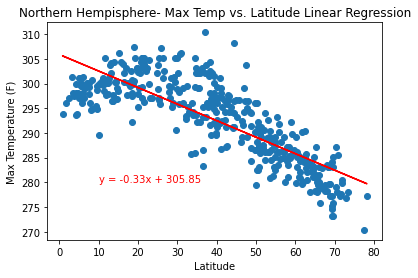

In [33]:
plot_regression(north_hem['lat'],
                north_hem['max_temp'], 
                'Northern Hempisphere- Max Temp vs. Latitude Linear Regression',
                'Latitude',
                'Max Temperature (F)',
                (10,280))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.6764708466175795


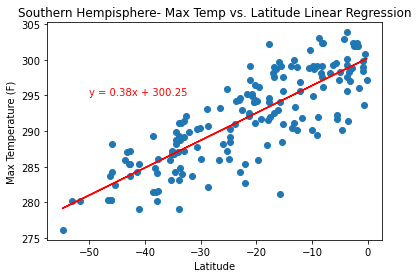

In [35]:
plot_regression(south_hem['lat'],
                south_hem['max_temp'], 
                'Southern Hempisphere- Max Temp vs. Latitude Linear Regression',
                'Latitude',
                'Max Temperature (F)',
                (-50,295))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.00026532505250329903


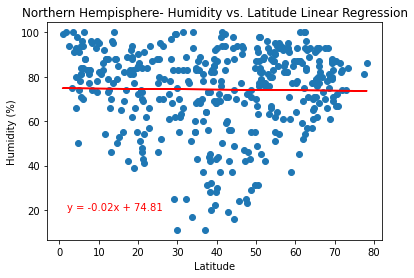

In [39]:
plot_regression(north_hem['lat'],
                north_hem['humidity'], 
                'Northern Hempisphere- Humidity vs. Latitude Linear Regression',
                'Latitude',
                'Humidity (%)',
                (2,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.002313552452855324


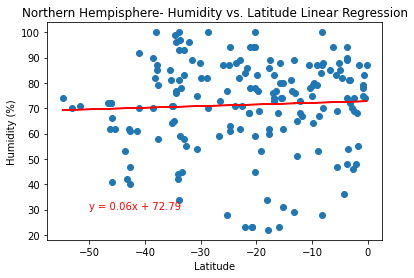

In [56]:
plot_regression(south_hem['lat'],
                south_hem['humidity'], 
                'Northern Hempisphere- Humidity vs. Latitude Linear Regression',
                'Latitude',
                'Humidity (%)',
                (-50,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.004325101514094792


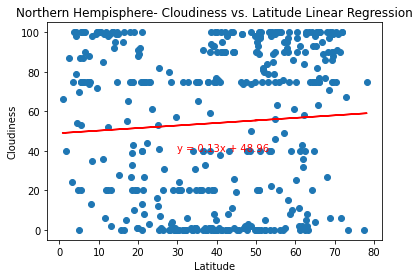

In [58]:
plot_regression(north_hem['lat'],
                north_hem['cloudiness'], 
                'Northern Hempisphere- Cloudiness vs. Latitude Linear Regression',
                'Latitude',
                'Cloudiness',
                (30,40))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 1.7764147340934235e-07


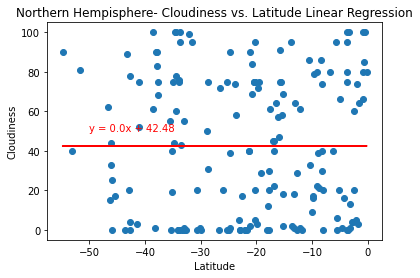

In [61]:
plot_regression(south_hem['lat'],
                south_hem['cloudiness'], 
                'Northern Hempisphere- Cloudiness vs. Latitude Linear Regression',
                'Latitude',
                'Cloudiness',
                (-50,50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.012288101697649862


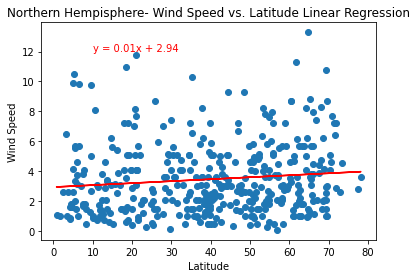

In [63]:
plot_regression(north_hem['lat'],
                north_hem['wind_speed'], 
                'Northern Hempisphere- Wind Speed vs. Latitude Linear Regression',
                'Latitude',
                'Wind Speed',
                (10,12))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.012288101697649862


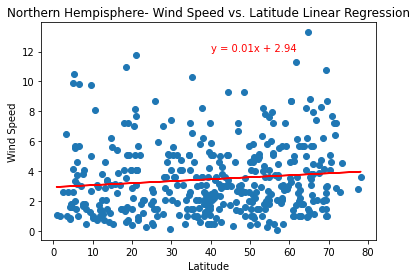

In [65]:
plot_regression(north_hem['lat'],
                north_hem['wind_speed'], 
                'Northern Hempisphere- Wind Speed vs. Latitude Linear Regression',
                'Latitude',
                'Wind Speed',
                (40,12))